## Logistic Regression Example using 'sklearn'
- Will use `make_classification` for generating dataset.
- Will use only `one feature` and `m` training sets.

<img src="images/model_lr.png" style="width:500px;text-align:center">


In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Generate Dataset

In [11]:
# Generate dataset for Logistic Regression
data_set_x_orig, data_set_y_orig = make_classification(n_samples=100,n_features=1, n_informative=1, n_redundant=0,n_classes=2,
    n_clusters_per_class=1,)

In [12]:
print(data_set_x_orig.shape)
print(data_set_x_orig[:,0])

(100, 1)
[ 0.86206238  1.76642679  1.69071048  1.38441123  1.34740479 -2.31659103
 -0.57550098  1.20156312 -1.1357938  -0.38515252 -0.40223414  0.99139657
  0.45767521  0.50044244  2.22352257 -1.99733187  0.65604871 -1.04373725
  0.05759343  1.78427573  1.29935166  0.51387069 -1.43130956 -1.06159835
 -3.32277985  0.17687942  0.31077425 -0.88579446 -1.03157418 -0.47238853
  1.08680795  1.67966221  0.62941909 -2.20344857  1.30327522 -1.35200498
 -0.56651293  1.30193469  0.8765958   1.90305352  0.44570443  0.86357797
 -1.75402255  1.87927691 -1.43707855 -1.75277574 -0.11085941  1.65183543
  0.42883964  0.98700921  2.46805059 -1.87729256  1.83941747  1.21209351
  1.1199808  -1.37515453  1.05514322  2.1221257  -2.17478355  1.46451064
  1.22180724  0.4995209   2.02264315 -1.17949819 -1.06949833  0.6201045
  0.13168485 -0.13450656 -1.73300966  1.34760382  1.19237869 -0.78163013
  0.70311702 -2.37595611 -1.00917377  0.73063476  0.73534416 -0.13853455
  1.80767463  1.58485926 -0.62070108 -1.672

### Visualization

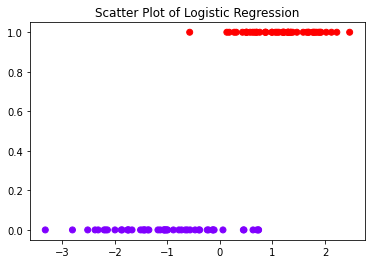

In [13]:
plt.scatter(data_set_x_orig[:,0], data_set_y_orig, c=data_set_y_orig, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [14]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(data_set_x_orig, data_set_y_orig, train_size=0.8, test_size=0.2, random_state=1)

In [15]:
# Create a Logistic Regression Object, perform Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [16]:
# Show to Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[2.38197874]]
[-0.44369277]


In [17]:
# Perform prediction using the test dataset
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0]


In [18]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 0,  8]])

**Mathematical expression of the algorithm**:

For $i^{(th)}$ example $x^{(i)}$:  

$z^{(i)} = w^T x^{(i)} + b$  

$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$  

$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$  

The cost is then computed by summing over all training examples:  

$J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.